# Car Price Predictor
## Preparing and describing the data

In [198]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [199]:
data = pd.read_csv('Data\CarPrice_Assignment.csv').drop(['car_ID','CarName'],axis=1)
data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [200]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

Nice! There is no missing data

In [201]:
data.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Looking for Correlations

In [202]:
correlations = data.select_dtypes(include=[np.number]).corr()

In [203]:
correlations['price'].sort_values(ascending= False)

price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
symboling          -0.079978
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64

In [204]:
# Deleting non important features
data.drop(['carheight','stroke','compressionratio','peakrpm'],axis=1,inplace=True)
data

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,2823,ohcv,six,152,mpfi,2.68,154,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,2337,ohc,four,109,mpfi,3.19,102,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,2824,ohc,five,136,mpfi,3.19,115,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,2952,ohc,four,141,mpfi,3.78,114,23,28,16845.0
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,3049,ohc,four,141,mpfi,3.78,160,19,25,19045.0
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,3012,ohcv,six,173,mpfi,3.58,134,18,23,21485.0
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,3217,ohc,six,145,idi,3.01,106,26,27,22470.0


array([[<AxesSubplot: title={'center': 'symboling'}>,
        <AxesSubplot: title={'center': 'wheelbase'}>,
        <AxesSubplot: title={'center': 'carlength'}>],
       [<AxesSubplot: title={'center': 'carwidth'}>,
        <AxesSubplot: title={'center': 'curbweight'}>,
        <AxesSubplot: title={'center': 'enginesize'}>],
       [<AxesSubplot: title={'center': 'boreratio'}>,
        <AxesSubplot: title={'center': 'horsepower'}>,
        <AxesSubplot: title={'center': 'citympg'}>],
       [<AxesSubplot: title={'center': 'highwaympg'}>,
        <AxesSubplot: title={'center': 'price'}>, <AxesSubplot: >]],
      dtype=object)

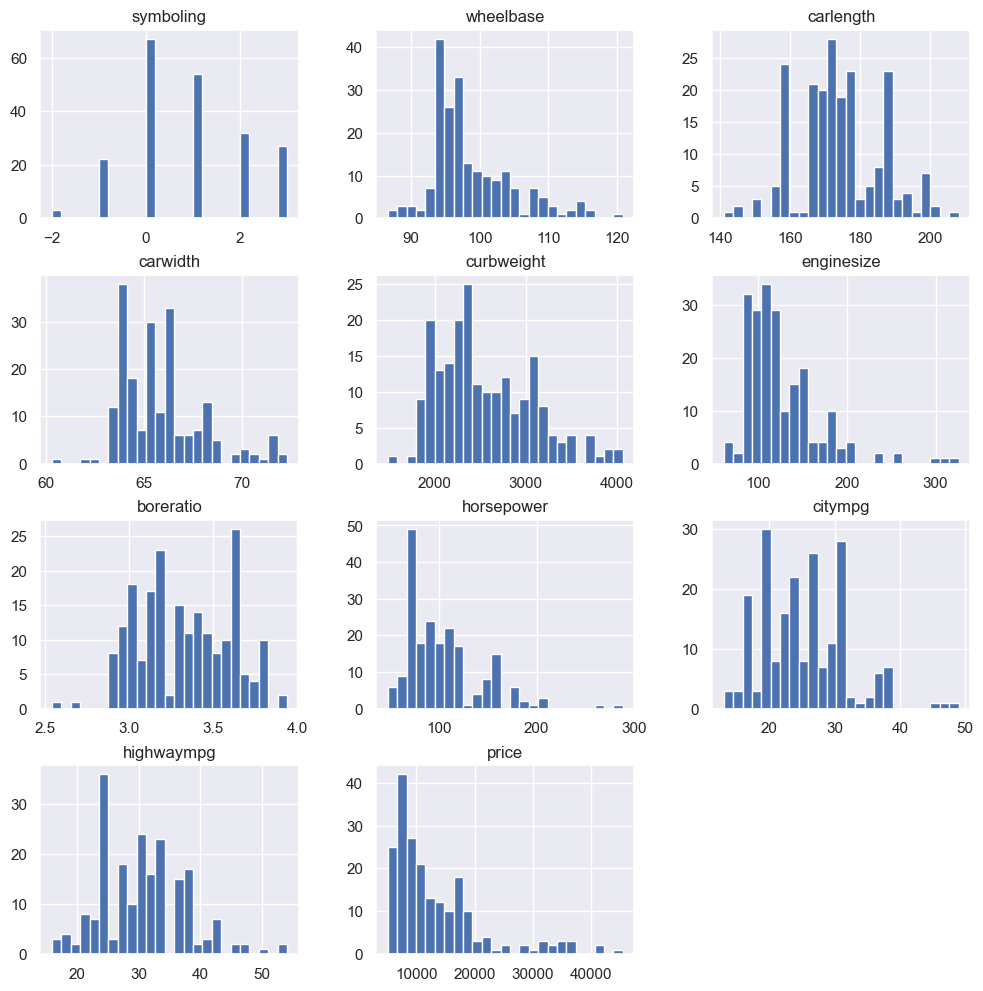

In [8]:
# Visualizing distributions
data.hist(bins=25,figsize=(12,12))

In [205]:
data.select_dtypes(include=(np.number)).mean()

symboling         0.834146
wheelbase        98.756585
carlength       174.049268
carwidth         65.907805
curbweight     2555.565854
enginesize      126.907317
boreratio         3.329756
horsepower      104.117073
citympg          25.219512
highwaympg       30.751220
price         13276.710571
dtype: float64

#### The distribution of wheelbase, horsepower and enginesize features has a right tail -values far from the mean aren't exponentialy rare- and should be transformed later.

array([], shape=(0, 9), dtype=object)

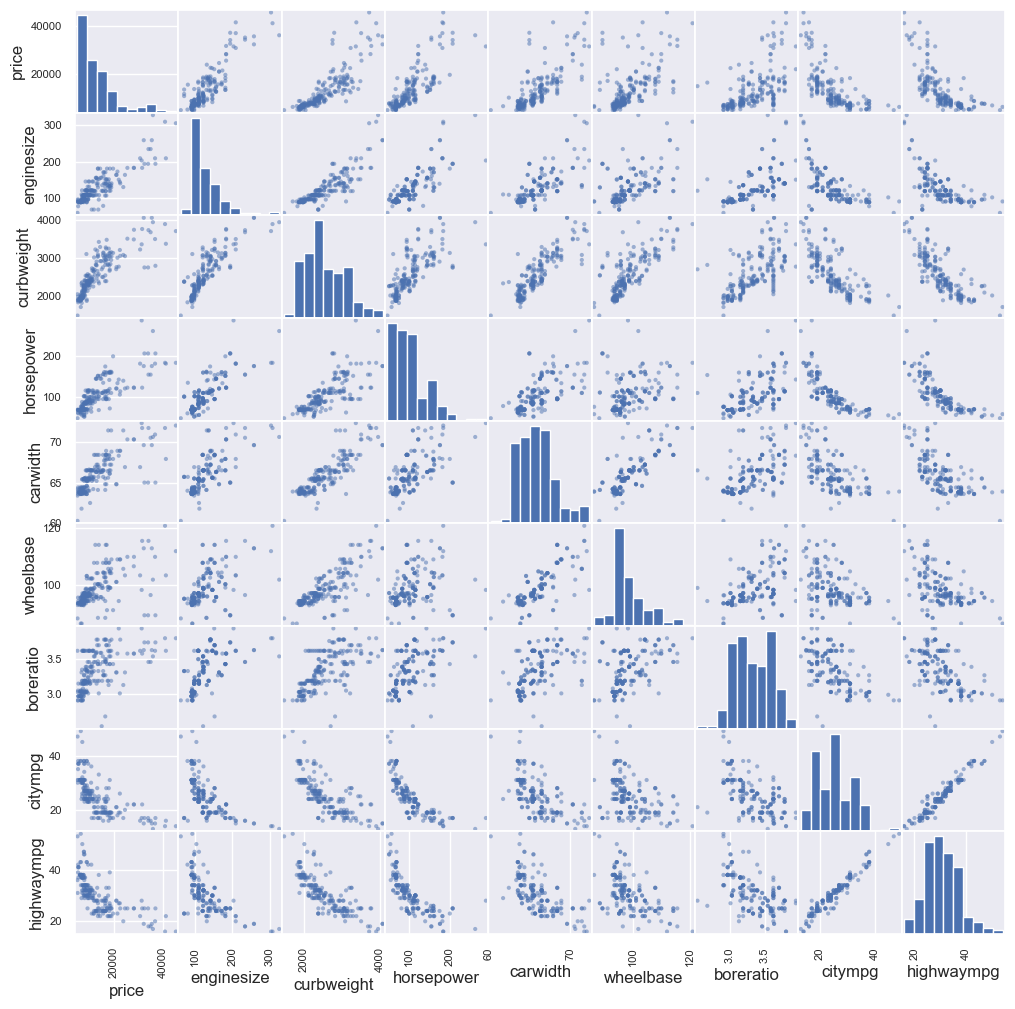

In [10]:
# Visualizing the correlations for the important features that affect most the price of the car
from pandas.plotting import scatter_matrix
important_features = ['price', 'enginesize','curbweight','horsepower',
                      'carwidth','wheelbase','boreratio','citympg','highwaympg']
scatter_matrix(data[important_features], figsize=(12,12))[:0]

## Spliting The Data
#### To ensure the trainig and testing data represent the whole data, the price feature will be categorized and the train_test spliting will be done over each category

In [206]:
from sklearn.model_selection import train_test_split

data['price_cat'] = pd.cut(data['price'],
                          bins=[0,10000,20000,30000,40000,50000,np.inf],
                          labels=[1,2,3,4,5,6])
print(data['price_cat'].value_counts())

1    100
2     79
4     12
3     11
5      3
6      0
Name: price_cat, dtype: int64


In [207]:
train_set, test_set = train_test_split(
    data, test_size=0.2, stratify=data['price_cat'], random_state=1)

In [208]:
# asserting the training data represent the whole data
print(data['price_cat'].value_counts() / len(data))
print(train_set['price_cat'].value_counts() / len(train_set))

1    0.487805
2    0.385366
4    0.058537
3    0.053659
5    0.014634
6    0.000000
Name: price_cat, dtype: float64
1    0.487805
2    0.384146
4    0.060976
3    0.054878
5    0.012195
6    0.000000
Name: price_cat, dtype: float64


In [209]:
for set in (train_set, test_set):
    set.drop('price_cat',axis=1,inplace=True)

## Cleaning the Data

In [210]:
features = train_set.drop('price',axis=1)
labels = train_set['price'].copy()

targets = test_set['price'].copy()

In [211]:
for set in (train_set, test_set):
    set.drop('price',axis=1,inplace=True)

In [212]:
#Categorical Features
cat_features = features.select_dtypes(include=[np.object_])
cat_features['symboling'] = features['symboling']

#Numeric Features
num_features = features.select_dtypes(include=[np.number]).drop('symboling',axis=1)

## Preprocessing
The distribution of wheelbase, horsepower and enginesize features has a right tail and should be transformed into a gaussian distribution before scaling so most values aren't crashed in a small interval

In [213]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

#Categorical Features Encoder Preprocessor
def cat_preproc():
    return OneHotEncoder(sparse=False, handle_unknown='ignore')

#Numeric Features scaler Preprocessor
def num_preproc():
    return StandardScaler()

#Right tailed Numeric Features Preprocessor
def power_preproc():
    return PowerTransformer()


preprocessor = ColumnTransformer([
    ('cat',cat_preproc(),list(cat_features.columns)),
    ('num',num_preproc(),list(num_features.columns)),
    ('power_num',power_preproc(),['wheelbase','enginesize','horsepower'])
])

## Defining Models' Metrics and Visualizations Methods
These will help to understand how each model handled the data

In [214]:
import pandas as pd

# This dataframe will help to see each model's performance side by side
Models = pd.DataFrame({
    "Model":[],
    "Train RMSE":[],
    "Test RMSE":[],
    "Train Mape":[],
    "Test Mape":[]
})

Models.set_index("Model", inplace=True)

In [215]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# This function will measure the performance of each model on both train and test sets
# Two metrics 
def model_accuracy(mod, name="model"):
    #Predictions
    train_pred = mod.predict(train_set)
    test_pred = mod.predict(test_set)
    
    #mean_squared_error
    train_rmse = mean_squared_error(train_pred, labels, squared=False).round(0)
    test_rmse = mean_squared_error(test_pred, targets, squared=False).round(0)
    
    # mean percentile error
    train_mape = (mean_absolute_percentage_error(train_pred, labels)*1e2).round(1)
    test_mape = (mean_absolute_percentage_error(test_pred, targets)*1e2).round(1)
    
    # adding the model's metrics to the Models dataframe
    if name != "model":
        Models.loc[name] = [train_rmse, test_rmse,
                            str(train_mape)+"%", str(test_mape)+"%"]
    
    print(name, "accuracy")
    print("----")
    print("RMSE_for_train_Data ",train_rmse)
    print("RMSE_for_test_Data  ",test_rmse)
    print("MAPE_for_train_Data ",train_mape,'%')
    print("Mape_for_test_Data  ",test_mape,'%')

In [216]:
# This code will save figures in "images" file
from pathlib import Path

IMAGES_PATH = Path() / "images"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [217]:
from sklearn.decomposition import PCA

# Here we will transform our 19D dataset into 1D dataset
# This will help visualize the results in a 2D plot
# The second Dimension will be the Price
pca = PCA(n_components=1)

decomp = pca.fit_transform(
    preprocessor.fit_transform(pd.concat([train_set, test_set])))

#decomp_test = pca.fit_transform(preprocessor.fit_transform(strat_test_set))
decomp_train = decomp[:len(train_set)]
decomp_test = decomp[len(train_set):]

def plot_predictions(mod, name="model", save=False, limited=True):
    axes = [-10,10,0,10]

    plt.figure(figsize=(12,4))
    
    plt.subplot(1,2,1)
    if limited:
        plt.xlim(-10,10)
        plt.ylim(0,50000)
    plt.scatter(decomp_train, labels, label="Actual")
    plt.scatter(decomp_train, mod.predict(train_set), label="Predicted")
    plt.title(name+ " performance on training data")
    plt.xlabel("Combined Features")
    plt.ylabel("Price")
    plt.legend(loc="upper left")
    
    plt.subplot(1,2,2)
    if limited:
        plt.xlim(-10,10)
        plt.ylim(0,50000)
    plt.scatter(decomp_test, targets, label="Actual")
    plt.scatter(decomp_test, mod.predict(test_set), label="Predicted")
    plt.title(name+ " performance on testing data")
    plt.xlabel("Combined Features")
    plt.legend(loc="upper left")
    
    if save:
        save_fig(name+" Performance")
    plt.show()


### 1) Linear Models

#### i) Linear Regression model

In [218]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

lin_reg_pipe = make_pipeline(preprocessor, LinearRegression())
lin_reg_pipe.fit(train_set,labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['fueltype', 'aspiration',
                                                   'doornumber', 'carbody',
                                                   'drivewheel',
                                                   'enginelocation',
                                                   'enginetype',
                                                   'cylindernumber',
                                                   'fuelsystem', 'symboling']),
                                                 ('num', StandardScaler(),
                                                  ['wheelbase', 'carlength',
                                                   'carwidth', 'curbweight',
                                                   'enginesize', 'boreratio',
                                                   'horsepower', 'citympg',
                                                   'highwaympg']),
                                                 ('power_num',
                                                  PowerTransformer(),
                                                  ['wheelbase', 'enginesize',
                                                   'horsepower'])])),
                ('linearregression', LinearRegression())])

In [219]:
model_accuracy(lin_reg_pipe, "Linear Regression")
Models

Linear Regression accuracy
----
RMSE_for_train_Data  1732.0
RMSE_for_test_Data   2544.0
MAPE_for_train_Data  11.0 %
Mape_for_test_Data   20.2 %


,Train RMSE,Test RMSE,Train Mape,Test Mape
Model,,,,
Linear Regression,1732.0,2544.0,11.0%,20.2%


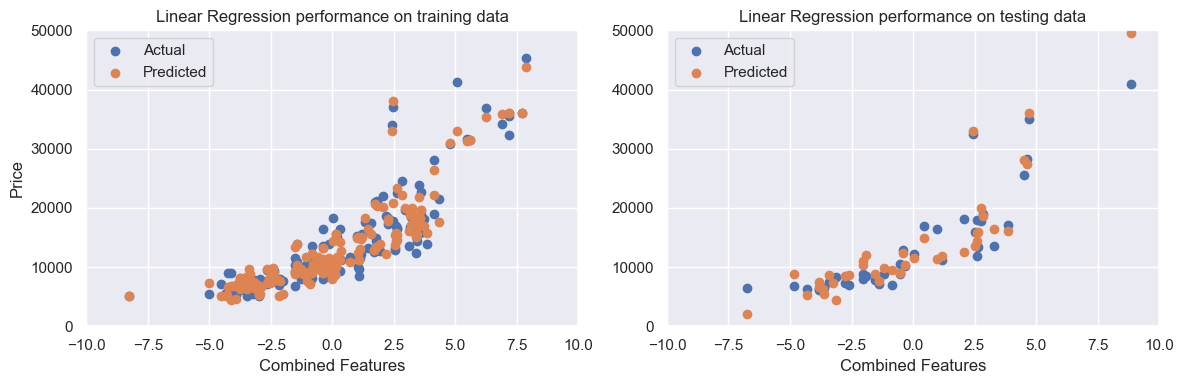

In [220]:
plot_predictions(lin_reg_pipe, "Linear Regression", True)

### Important Note:
The figure shown above (and all other similar figures later) doesn't reflect the real distribution of the dataset, since the dataset has 20 features, it will require a 20 dimensional plot! Recall that we used the Dimensionality Reduction Method PCA earlier to bring those 20 Features down to 2 Feature, the explained variance (in other words, how much of the variance has been Kept after we reduced dimensions from 19D down to 2D) can be easily reached by: 

In [221]:
pca.explained_variance_ratio_

array([0.56167913])

Although This can be a catastrophic value when using the transformed data for further calculations, it by no means interest us when we just use it to visualize the data, as long as it provides an enough visual information to give insigts on the model's performance.

#### ii) Stochastic Gradient Descent model

In [222]:
from sklearn.linear_model import SGDRegressor

sgd_pipe = make_pipeline(preprocessor, SGDRegressor(max_iter=2000, eta0=0.09, n_iter_no_change=10, tol=1e-3, random_state=1))
sgd_pipe.fit(train_set, labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['fueltype', 'aspiration',
                                                   'doornumber', 'carbody',
                                                   'drivewheel',
                                                   'enginelocation',
                                                   'enginetype',
                                                   'cylindernumber',
                                                   'fuelsystem', 'symboling']),
                                                 ('num', StandardScaler(),
                                                  ['wheelbase', 'carlength',
                                                   'carwidth', 'curbweight',
                                                   'enginesize', 'boreratio',
                                                   'horsepower', 'citympg',
                                                   'highwaympg']),
                                                 ('power_num',
                                                  PowerTransformer(),
                                                  ['wheelbase', 'enginesize',
                                                   'horsepower'])])),
                ('sgdregressor',
                 SGDRegressor(eta0=0.09, max_iter=2000, n_iter_no_change=10,
                              random_state=1))])

In [227]:
model_accuracy(sgd_pipe, "SGD Regressor")

SGD Regressor accuracy
----
RMSE_for_train_Data  1931.0
RMSE_for_test_Data   2357.0
MAPE_for_train_Data  11.3 %
Mape_for_test_Data   14.4 %


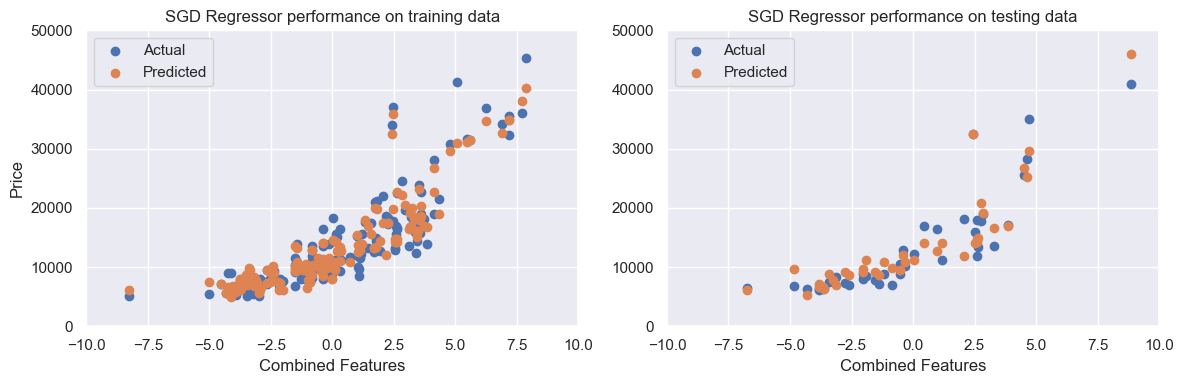

In [224]:
plot_predictions(sgd_pipe, "SGD Regressor", True)

### iii) Ridge Model
Ridge is a regularized version of linear regression that changes the cost function to generalize the model and prevent it from overfitting.

In [225]:
from sklearn.linear_model import Ridge

rdg_pipe = make_pipeline(preprocessor, Ridge(alpha=10))
rdg_pipe.fit(train_set, labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['fueltype', 'aspiration',
                                                   'doornumber', 'carbody',
                                                   'drivewheel',
                                                   'enginelocation',
                                                   'enginetype',
                                                   'cylindernumber',
                                                   'fuelsystem', 'symboling']),
                                                 ('num', StandardScaler(),
                                                  ['wheelbase', 'carlength',
                                                   'carwidth', 'curbweight',
                                                   'enginesize', 'boreratio',
                                                   'horsepower', 'citympg',
                                                   'highwaympg']),
                                                 ('power_num',
                                                  PowerTransformer(),
                                                  ['wheelbase', 'enginesize',
                                                   'horsepower'])])),
                ('ridge', Ridge(alpha=10))])

In [226]:
model_accuracy(rdg_pipe, "Ridge")

Ridge accuracy
----
RMSE_for_train_Data  2513.0
RMSE_for_test_Data   2423.0
MAPE_for_train_Data  13.9 %
Mape_for_test_Data   14.1 %


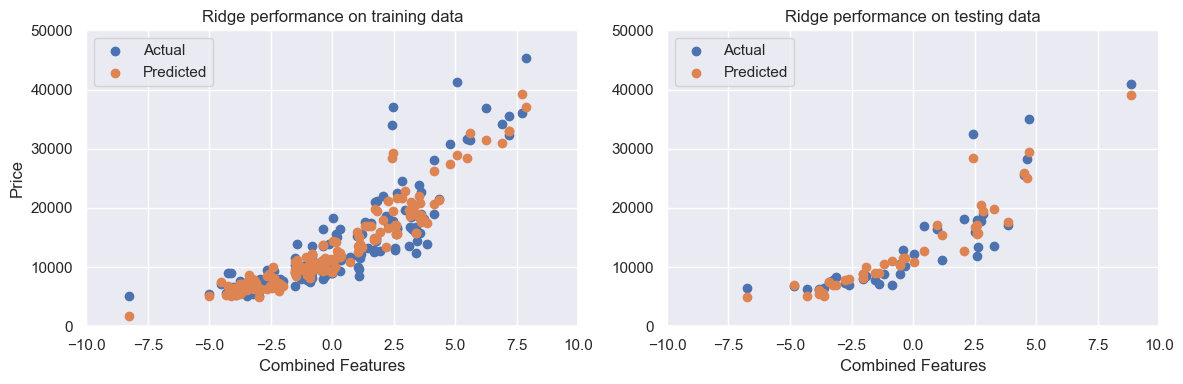

In [228]:
plot_predictions(rdg_pipe, "Ridge", True)

## 2) Support Vector Machine Models

#### i) Linear SVR

In [229]:
from sklearn.svm import LinearSVR

lin_svr_pipe = make_pipeline(preprocessor, LinearSVR())
lin_svr_pipe.fit(train_set, labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['fueltype', 'aspiration',
                                                   'doornumber', 'carbody',
                                                   'drivewheel',
                                                   'enginelocation',
                                                   'enginetype',
                                                   'cylindernumber',
                                                   'fuelsystem', 'symboling']),
                                                 ('num', StandardScaler(),
                                                  ['wheelbase', 'carlength',
                                                   'carwidth', 'curbweight',
                                                   'enginesize', 'boreratio',
                                                   'horsepower', 'citympg',
                                                   'highwaympg']),
                                                 ('power_num',
                                                  PowerTransformer(),
                                                  ['wheelbase', 'enginesize',
                                                   'horsepower'])])),
                ('linearsvr', LinearSVR())])

In [230]:
model_accuracy(lin_svr_pipe, "Linear SVR")

Linear SVR accuracy
----
RMSE_for_train_Data  14549.0
RMSE_for_test_Data   14865.0
MAPE_for_train_Data  1204.3 %
Mape_for_test_Data   1260.1 %


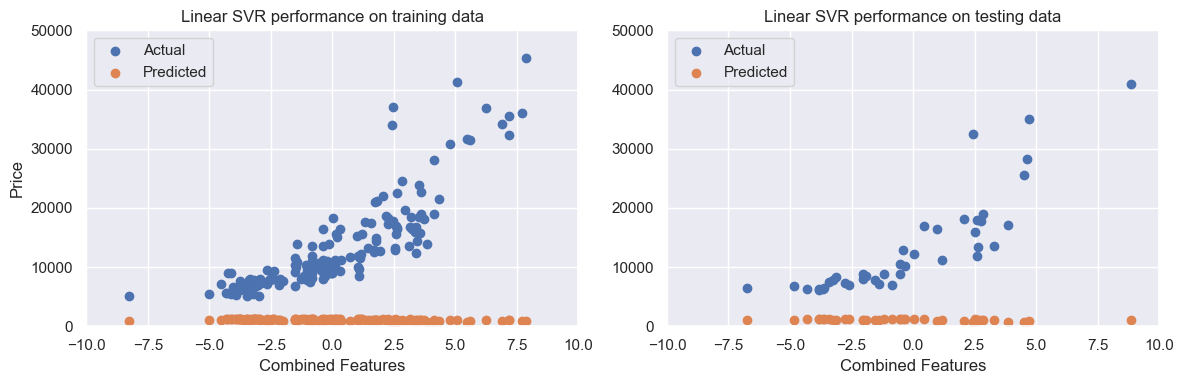

In [231]:
plot_predictions(lin_svr_pipe,"Linear SVR",True)

In [232]:
lin_svr_pipe.predict(train_set).mean()

1074.3170731707316

### Analysis
This model performed so badly, we weill regularize it by tuning the C hyperparameter.  
We will search for the best value that minimizes MAPE on both train and test sets.

In [241]:
def lin_svr_investigator(start, end, step=100):
    C = np.linspace(start, end, step)
    m1 = [0] * len(C)
    m2 = [0] * len(C)
    
    for i in range (0,len(C)):    
        reg = make_pipeline(preprocessor,
                           LinearSVR(C=C[i], random_state=1))
        reg.fit(train_set, labels)
    
        m1[i] = mean_absolute_percentage_error(reg.predict(train_set), labels)
        m2[i] = mean_absolute_percentage_error(reg.predict(test_set), targets)
    
    plt.plot(C, m1, label="Train_MAPE")
    plt.plot(C, m2, label="Test_MAPE")
    plt.title("Linear SVR Performance")
    plt.xlabel("C")
    plt.ylabel("Mean Apsolute Percentage Error")
    plt.legend()
    save_fig("Linear SVR " +  "C in (" + str(start) + "," + str(end) + ")")
    return C,m1,m2

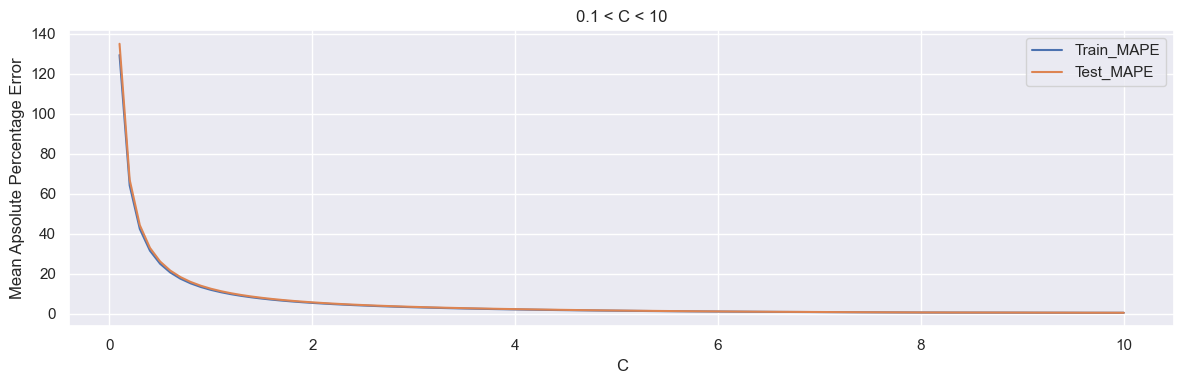

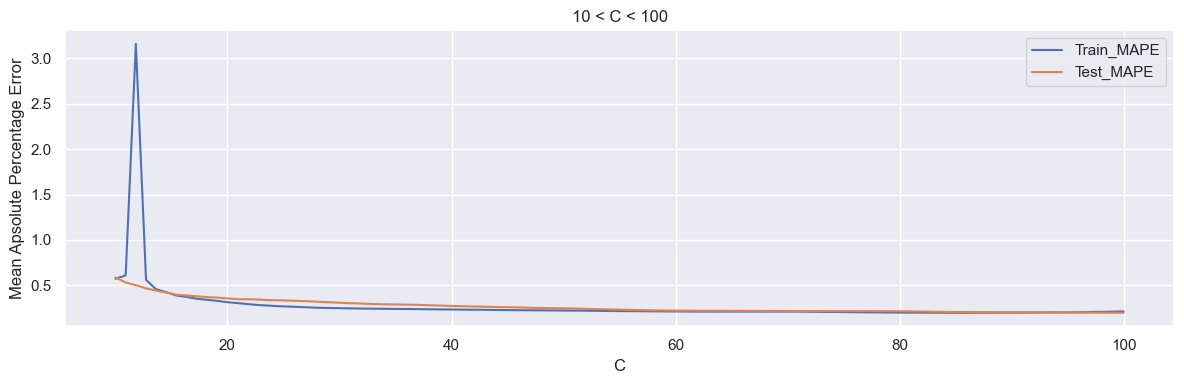

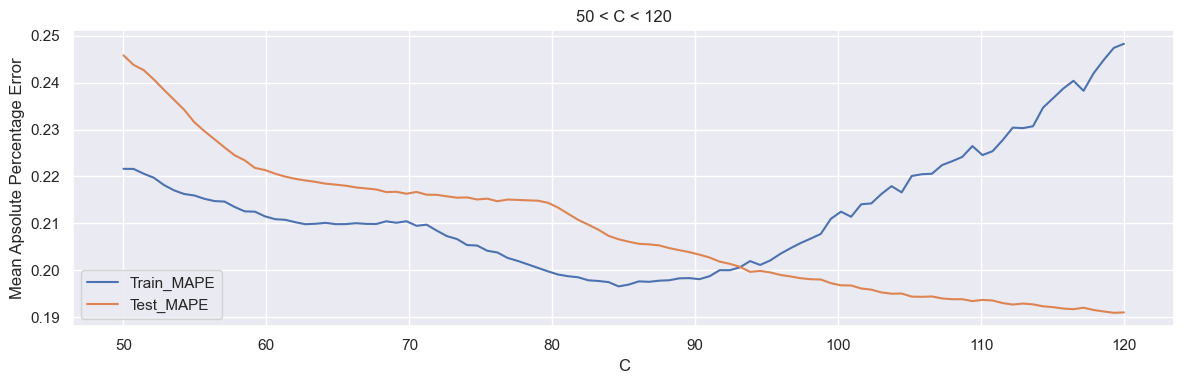

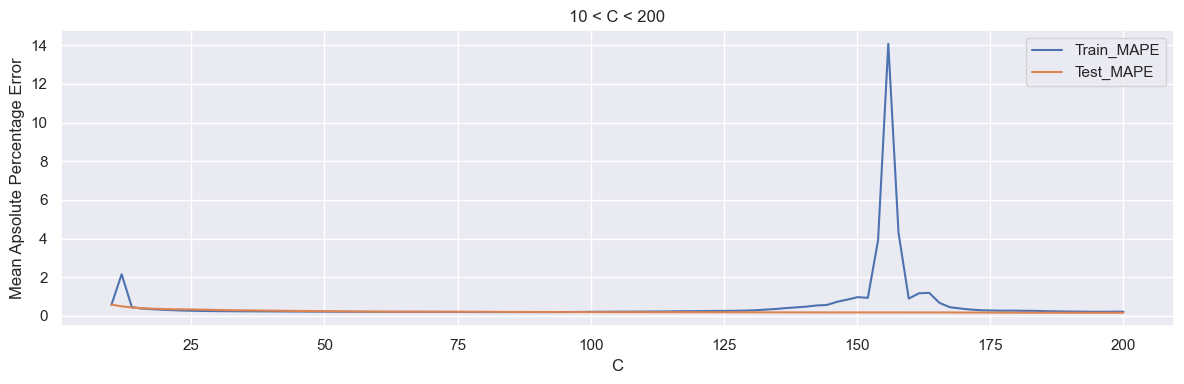

In [242]:
intervals = ((0.1,10),(10,100),(50,120),(10,200))

for i in range (0,4):
    plt.figure(figsize=(12,4))
    lin_svr_investigator(intervals[i][0], intervals[i][1])
    plt.title(str(intervals[i][0]) + " < C < " + str(intervals[i][1]))
    plt.show()

### Analysis
It seems like the best C lies between 90 < C < 100 (see the third plot), which minimizes the MAPE while performing equally on both train and test datasets. 

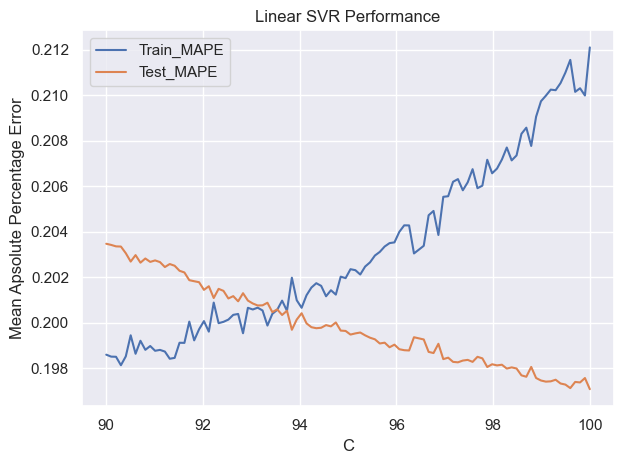

In [243]:
C, m1, m2 = lin_svr_investigator(90,100)

In [244]:
Best_C = C[min(np.array(m1)-np.array(m2)) == np.array(m1)-np.array(m2)][0]
Best_C

90.3030303030303

### Now we reconstruct the model

In [245]:
best_lin_svr_pipe = make_pipeline(preprocessor,
                                 LinearSVR(C=Best_C, epsilon=1, random_state=1))
best_lin_svr_pipe.fit(train_set, labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['fueltype', 'aspiration',
                                                   'doornumber', 'carbody',
                                                   'drivewheel',
                                                   'enginelocation',
                                                   'enginetype',
                                                   'cylindernumber',
                                                   'fuelsystem', 'symboling']),
                                                 ('num', StandardScaler(),
                                                  ['wheelbase', 'carlength',
                                                   'carwidth', 'curbweight',
                                                   'enginesize', 'boreratio',
                                                   'horsepower', 'citympg',
                                                   'highwaympg']),
                                                 ('power_num',
                                                  PowerTransformer(),
                                                  ['wheelbase', 'enginesize',
                                                   'horsepower'])])),
                ('linearsvr',
                 LinearSVR(C=90.3030303030303, epsilon=1, random_state=1))])

In [246]:
model_accuracy(best_lin_svr_pipe, "Linear SVR")
Models

Linear SVR accuracy
----
RMSE_for_train_Data  4142.0
RMSE_for_test_Data   4536.0
MAPE_for_train_Data  19.8 %
Mape_for_test_Data   20.3 %


,Train RMSE,Test RMSE,Train Mape,Test Mape
Model,,,,
Linear Regression,1732.0,2544.0,11.0%,20.2%
SGD Regressor,1931.0,2357.0,11.3%,14.4%
Ridge,2513.0,2423.0,13.9%,14.1%
Linear SVR,4142.0,4536.0,19.8%,20.3%


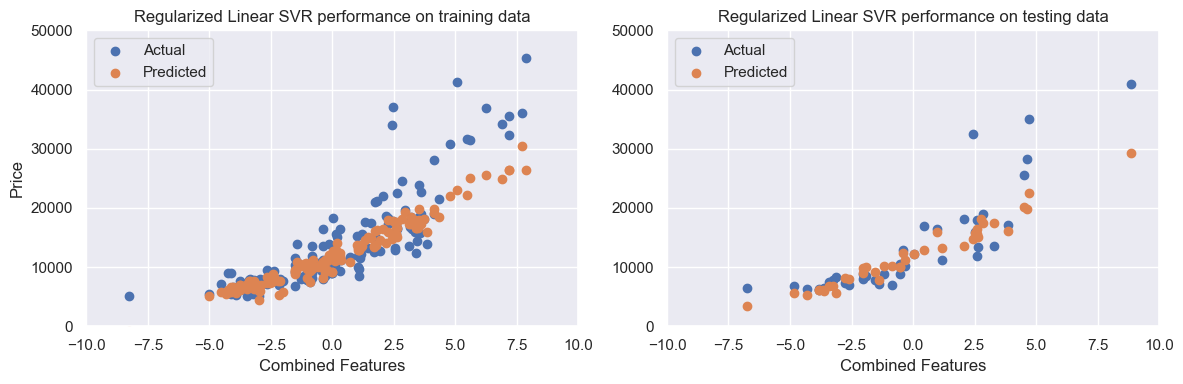

In [247]:
plot_predictions(best_lin_svr_pipe, "Regularized Linear SVR", True)

### Analysis
Even after finding the best value of C, the model seems to have many flaws, first, it's predictions are stacked within a narrow vertical range (or road) that doesn't reflect the original vertical range of the data, such a pattern is expected for SVM models. The epsilon hyperparameter (which may affect the vertical widness of this "road") may help in this case, but after adjusting it several times, it made no Changes to the Predictions.  
I wouldn't choose such a model.

### ii) SVR with Polynomial Kernel
We will start by finding the most appropriate degree of our polynomial that minimizes MAPE while performing equally good on both training and testing dataset

In [249]:
from sklearn.svm import SVR

def pol_svr_investigator(n=25):
    degree = [0]*n
    m1 = [0]*n
    m2 = [0]*n
    
    for i in range (0,n):    
        degree[i] = i
    
        reg = make_pipeline(preprocessor,
                           SVR(kernel="poly", degree=i))
        reg.fit(train_set, labels)
    
        m1[i] = mean_absolute_percentage_error(reg.predict(train_set), labels)
        m2[i] = mean_absolute_percentage_error(reg.predict(test_set), targets)
    
    plt.plot(degree, m1, label="Train_MAPE")
    plt.plot(degree, m2, label="Test_MAPE")
    plt.title("Polynomial SVR Performence with different Degrres")
    plt.xlabel("degree")
    plt.ylabel("mean_absolute_percentage_error")
    plt.legend()
    plt.grid(True)
    save_fig("Polynomial SVR - different degrees")
    plt.show()

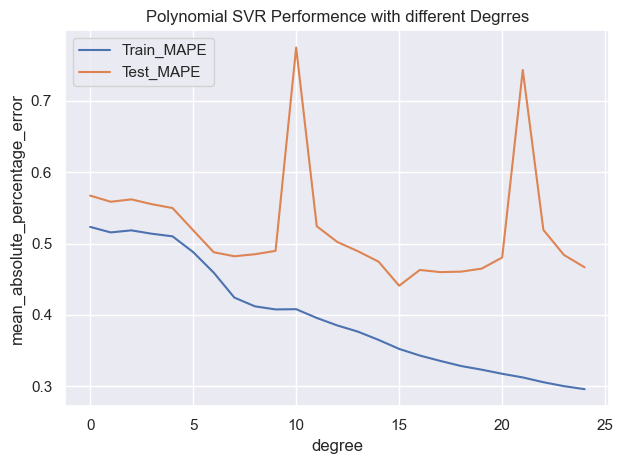

In [250]:
pol_svr_investigator()

### Analysis
The best degree seems to be one of (4,5,6), however, the model performs poorly with every value ot these three, it gave almost MAPE = 0.5  
I wouldn't give more time investing such a model.

### 3) Decision Tree Regressor Model

In [251]:
from sklearn.tree import DecisionTreeRegressor

tree_pipe = make_pipeline(preprocessor,DecisionTreeRegressor(max_leaf_nodes=5, random_state=1))
tree_pipe.fit(train_set,labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['fueltype', 'aspiration',
                                                   'doornumber', 'carbody',
                                                   'drivewheel',
                                                   'enginelocation',
                                                   'enginetype',
                                                   'cylindernumber',
                                                   'fuelsystem', 'symboling']),
                                                 ('num', StandardScaler(),
                                                  ['wheelbase', 'carlength',
                                                   'carwidth', 'curbweight',
                                                   'enginesize', 'boreratio',
                                                   'horsepower', 'citympg',
                                                   'highwaympg']),
                                                 ('power_num',
                                                  PowerTransformer(),
                                                  ['wheelbase', 'enginesize',
                                                   'horsepower'])])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(max_leaf_nodes=5, random_state=1))])

In [252]:
model_accuracy(tree_pipe, "Decision Tree Regressor")

Decision Tree Regressor accuracy
----
RMSE_for_train_Data  2445.0
RMSE_for_test_Data   3086.0
MAPE_for_train_Data  14.0 %
Mape_for_test_Data   14.2 %


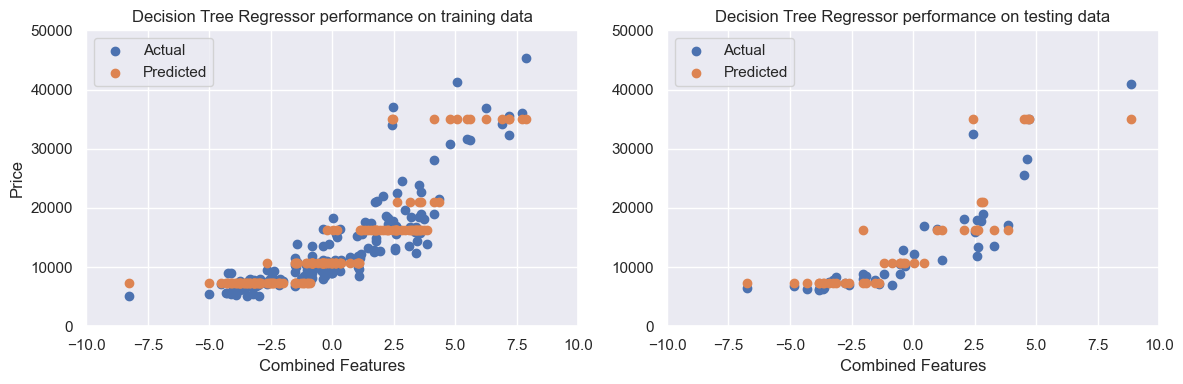

In [253]:
plot_predictions(tree_pipe, "Decision Tree Regressor", True)

### Model Analysis
Such A pattern is natural when dealing with decision trees, a random forest can give much better results, since it's constructed from stacked Decision Trees.

### 4) Random Forest Regressor

In [254]:
from sklearn.ensemble import RandomForestRegressor

forest_pipe = make_pipeline(preprocessor,RandomForestRegressor(max_depth=3, n_jobs=-1, random_state=1))
forest_pipe.fit(train_set,labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['fueltype', 'aspiration',
                                                   'doornumber', 'carbody',
                                                   'drivewheel',
                                                   'enginelocation',
                                                   'enginetype',
                                                   'cylindernumber',
                                                   'fuelsystem', 'symboling']),
                                                 ('num', StandardScaler(),
                                                  ['wheelbase', 'carlength',
                                                   'carwidth', 'curbweight',
                                                   'enginesize', 'boreratio',
                                                   'horsepower', 'citympg',
                                                   'highwaympg']),
                                                 ('power_num',
                                                  PowerTransformer(),
                                                  ['wheelbase', 'enginesize',
                                                   'horsepower'])])),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=3, n_jobs=-1,
                                       random_state=1))])

In [255]:
# Those are the number of decision trees in the model
forest_pipe._final_estimator.n_estimators

100

In [256]:
model_accuracy(forest_pipe, "Random Forest Regressor")

Random Forest Regressor accuracy
----
RMSE_for_train_Data  1982.0
RMSE_for_test_Data   2202.0
MAPE_for_train_Data  11.6 %
Mape_for_test_Data   11.5 %


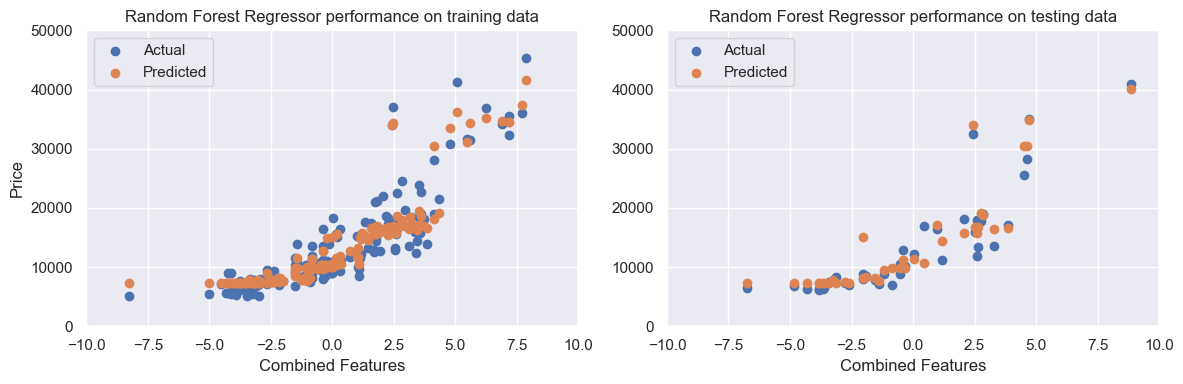

In [257]:
plot_predictions(forest_pipe, "Random Forest Regressor", True)

### Final Analysis

In [258]:
Models

,Train RMSE,Test RMSE,Train Mape,Test Mape
Model,,,,
Linear Regression,1732.0,2544.0,11.0%,20.2%
SGD Regressor,1931.0,2357.0,11.3%,14.4%
Ridge,2513.0,2423.0,13.9%,14.1%
Linear SVR,4142.0,4536.0,19.8%,20.3%
Decision Tree Regressor,2445.0,3086.0,14.0%,14.2%
Random Forest Regressor,1982.0,2202.0,11.6%,11.5%


By analyzing these numbers, and the performance of each model given by the MAPE visualization, there are two best models
### i) Ridge
### ii) Random Forest Regressor
both will give almost good results, they are both within an acceptaple range of accuracy and with no overfitting to the training data.  
This time i will go with the random forest regressor.

## Saving the Model

In [259]:
import joblib

# dumping the model in a pkl file
joblib.dump(forest_pipe,"Best_Model.pkl")

['Best_Model.pkl']

## Taking the Model into Action
### Write this code in order to use the model without runing the whole script

In [260]:
import joblib

# just load the file
car_pricing_model = joblib.load("Best_Model.pkl")

# then use it to make predictions
#car_pricing_model.predict(test_set)